<a href="https://colab.research.google.com/github/kurnya/221230039-Pengantar-ML/blob/main/week-03/praktikum_3_visualisasi_data_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)
df = X.copy()
df["target"] = y

/tmp/ipython-input-4146125530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlations.values, y=correlations.index, palette="Blues_d")


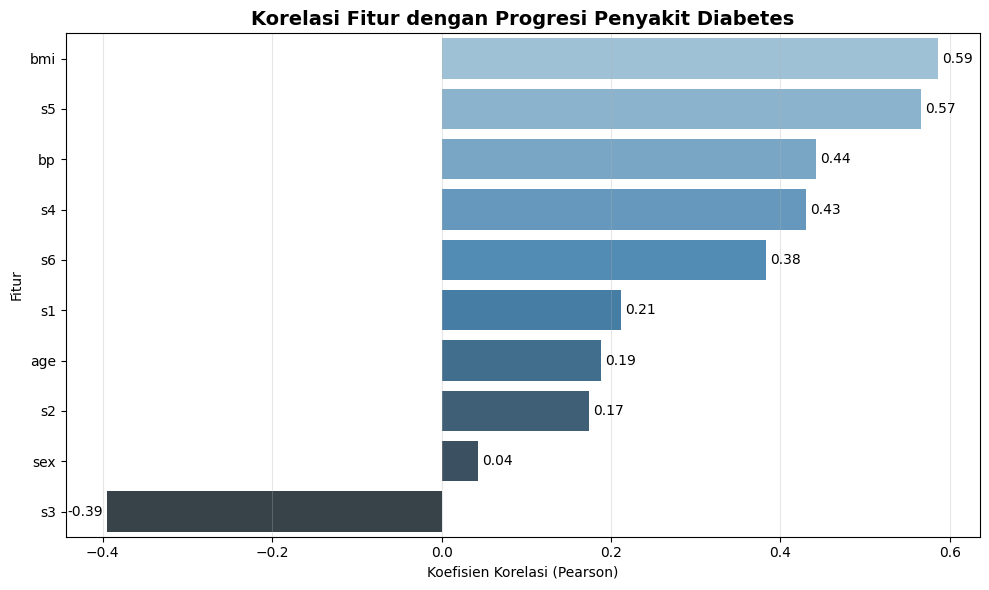

In [2]:
# === Bagian 1: Korelasi Fitur dengan Target ===
correlations = df.corr()["target"].drop("target").sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=correlations.values, y=correlations.index, palette="Blues_d")
plt.title("Korelasi Fitur dengan Progresi Penyakit Diabetes", fontsize=14, fontweight='bold')
plt.xlabel("Koefisien Korelasi (Pearson)")
plt.ylabel("Fitur")
plt.grid(axis='x', alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig("barchart_korelasi_fitur_diabetes.png")
plt.show()

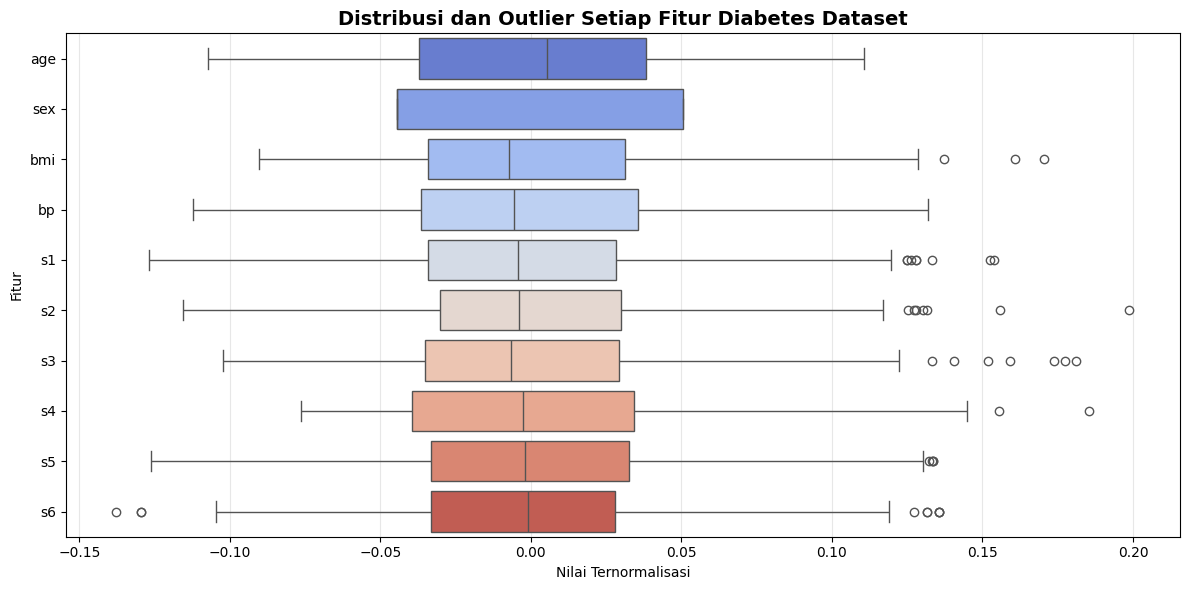

In [3]:
# === Bagian 2: Boxplot Distribusi dan Outlier ===
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["target"]), orient="h", palette="coolwarm")
plt.title("Distribusi dan Outlier Setiap Fitur Diabetes Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Nilai Ternormalisasi")
plt.ylabel("Fitur")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

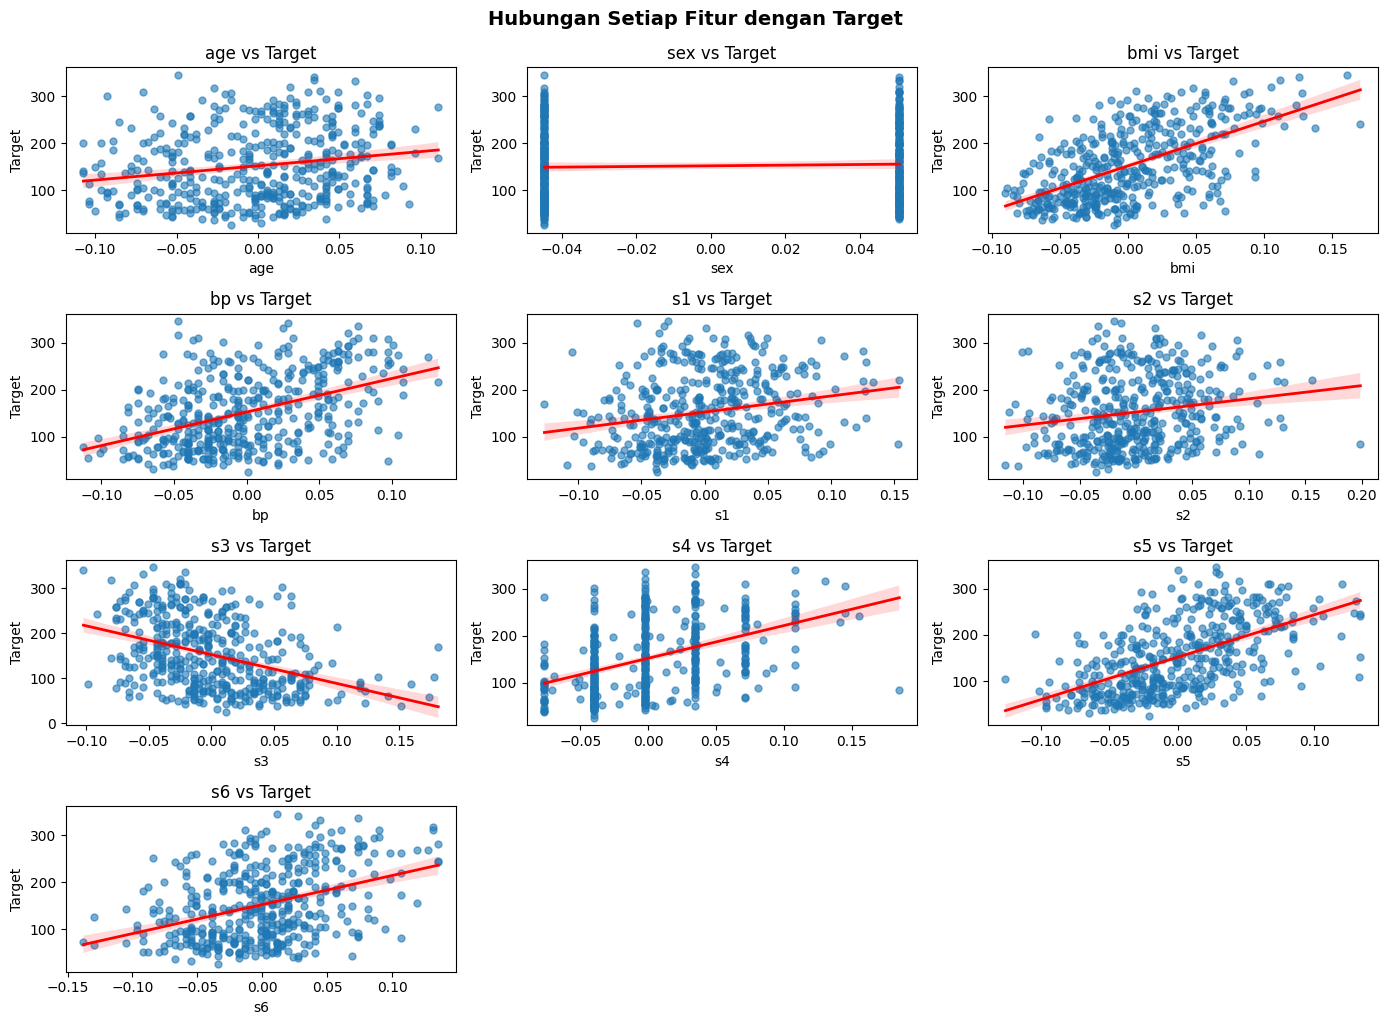

In [4]:
# === Bagian 3: Scatter Plot dengan Garis Regresi ===
feature_columns = df.columns.drop("target")

plt.figure(figsize=(14, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(4, 3, i)
    sns.regplot(
        x=df[feature],
        y=df["target"],
        scatter_kws={'alpha': 0.6, 's': 25},
        line_kws={'color': 'red', 'lw': 2}
    )
    plt.title(f"{feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")

plt.tight_layout()
plt.suptitle("Hubungan Setiap Fitur dengan Target", fontsize=14, fontweight='bold', y=1.02)
plt.show()

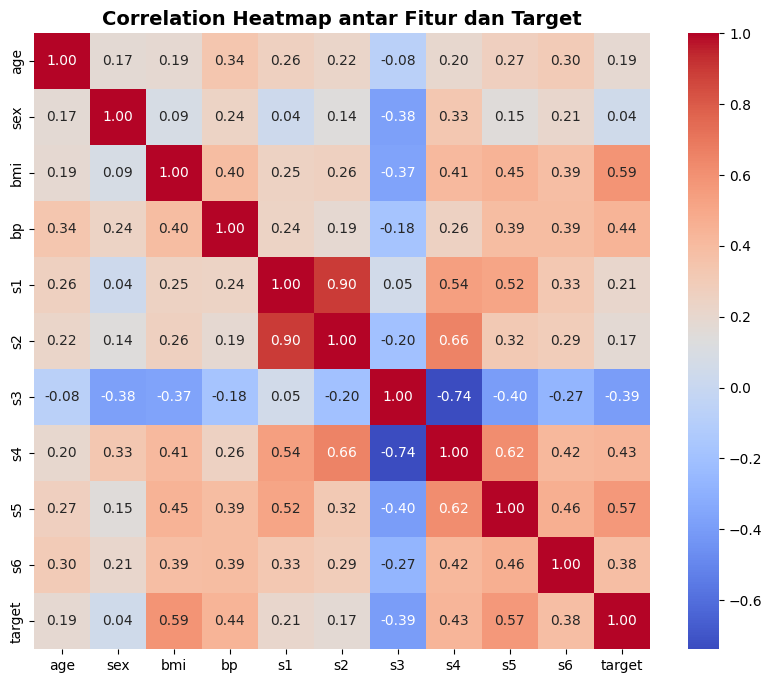

In [5]:
# === Bagian 4a: Heatmap Korelasi ===
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap antar Fitur dan Target", fontsize=14, fontweight='bold')
plt.show()


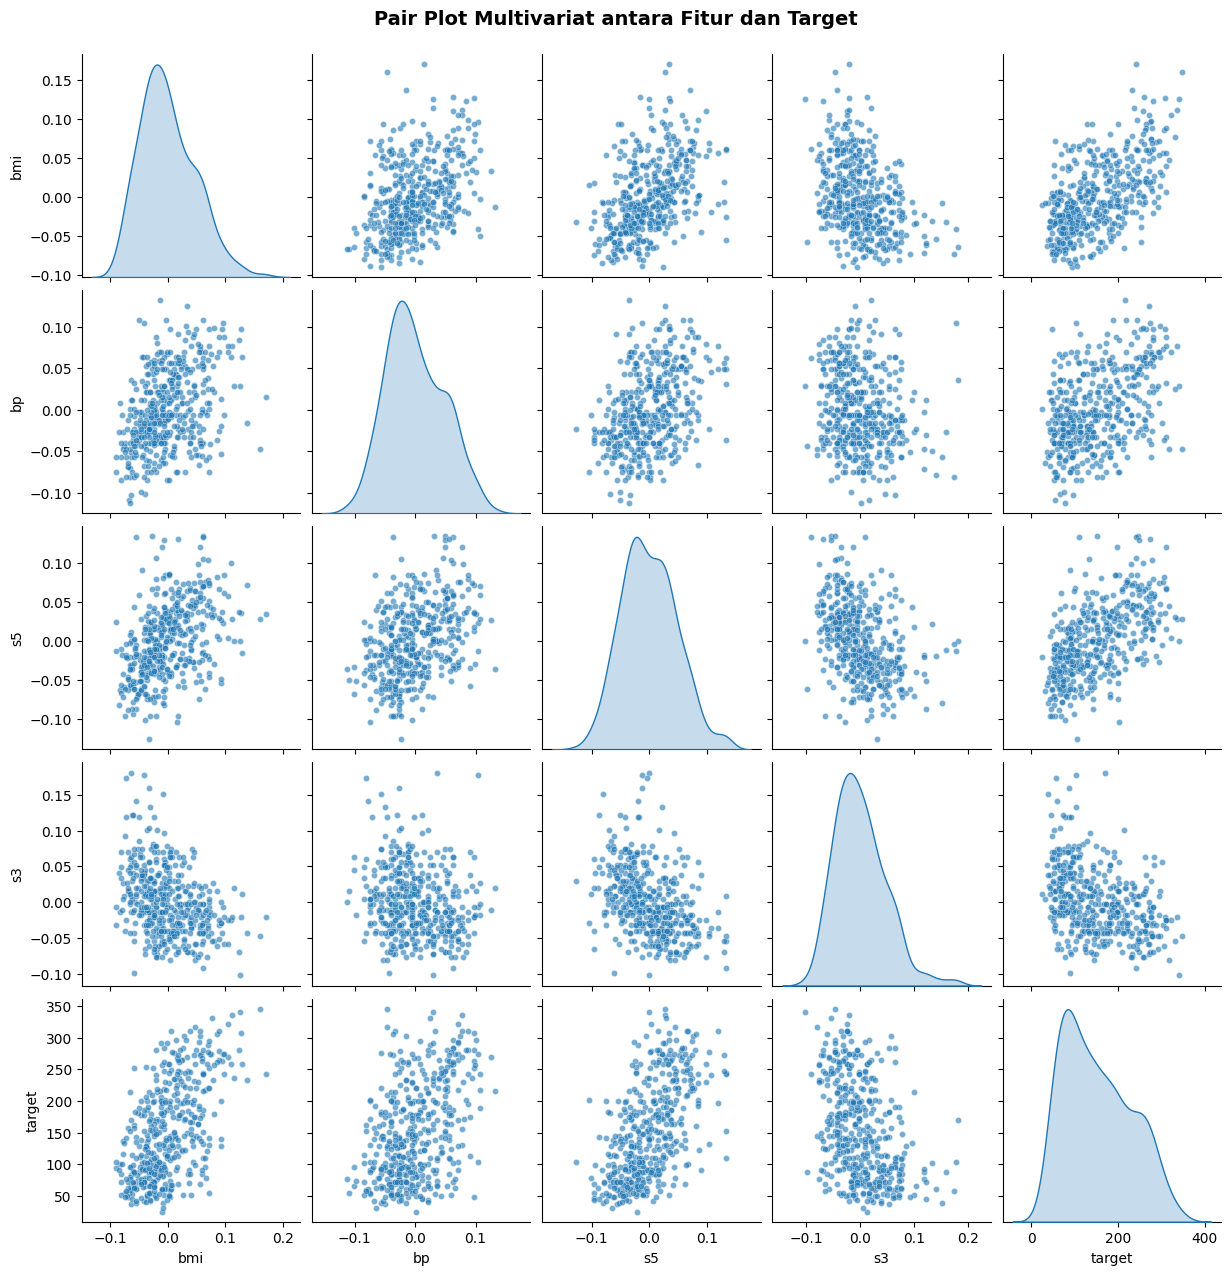

In [6]:
# === Bagian 4b: Pair Plot Multivariat ===
selected_features = ["bmi", "bp", "s5", "s3", "target"]
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle("Pair Plot Multivariat antara Fitur dan Target", fontsize=14, fontweight='bold', y=1.02)
plt.show()

/tmp/ipython-input-4193074003.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


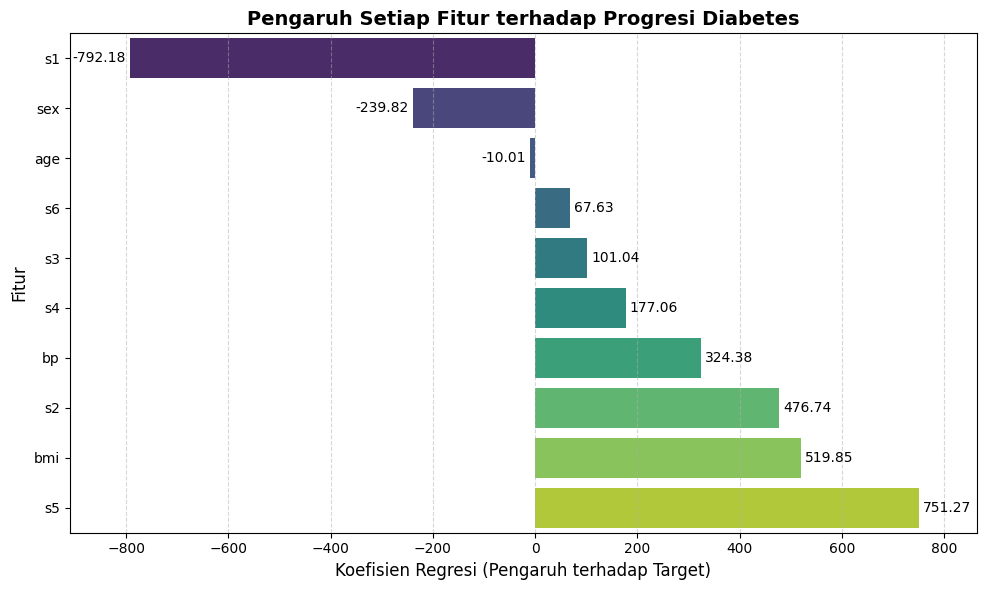

  Feature  Coefficient
4      s1  -792.175639
1     sex  -239.815644
0     age   -10.009866
9      s6    67.626692
6      s3   101.043268
7      s4   177.063238
3      bp   324.384646
5      s2   476.739021
2     bmi   519.845920
8      s5   751.273700


In [7]:
# === Bagian 5: Analisis Koefisien Regresi ===
model = LinearRegression()
model.fit(X, y)

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values("Coefficient", ascending=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.xlabel("Koefisien Regresi (Pengaruh terhadap Target)", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.title("Pengaruh Setiap Fitur terhadap Progresi Diabetes", fontweight="bold", fontsize=14)
plt.grid(axis='x', alpha=0.5, linestyle='--')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

max_coef = coef_df["Coefficient"].max()
min_coef = coef_df["Coefficient"].min()
plt.xlim(min_coef - abs(min_coef)*0.15, max_coef + abs(max_coef)*0.15)
plt.tight_layout()
plt.show()

print(coef_df)